# MOOC : Recherche reproductible - principes méthodologiques pour une science transparente
## Travaux pratiques

###  Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir [Keeling Curve wikipedia](https://en.wikipedia.org/wiki/Keeling_Curve) pour l'histoire et l'importance de ces données).

Les données sont disponibles sur le site Web de l'institut Scripps. Utilisez le fichier avec les observations hebdomadaires. Attention, ce fichier est mis à jour régulièrement avec de nouvelles observations. Notez donc bien la date du téléchargement, et gardez une copie locale de la version précise que vous analysez. Faites aussi attention aux données manquantes.

Votre mission si vous l'acceptez :
1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.
2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).

### 1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.

Nous utiliserons les données de la base de [Mauna Loa](https://fr.wikipedia.org/wiki/Mauna_Loa) situé à Hawaï au coeur du Pacifique à 3397m d'altitude. Elles ont été téléchargées le **13/07/2023**.
Nous chargeons les données et en faisons un nettoyage et une exploration simple dans un premier temps.

In [158]:
# Import packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Load data
raw_data = pd.read_csv("monthly_in_situ_co2_mlo.csv", skiprows=57, sep=",", encoding='utf-8')
raw_data.head()

Yr   Mn      Date         Date       CO2  seasonally          fit  \
0                                                adjusted                
1                Excel                  [ppm]      [ppm]         [ppm]   
2  1958   01     21200    1958.0411    -99.99      -99.99       -99.99   
3  1958   02     21231    1958.1260    -99.99      -99.99       -99.99   
4  1958   03     21259    1958.2027    315.71      314.44       316.19   

     seasonally           CO2       seasonally   Sta  
0  adjusted fit        filled  adjusted filled   NaN  
1         [ppm]         [ppm]            [ppm]   NaN  
2        -99.99        -99.99           -99.99   MLO  
3        -99.99        -99.99           -99.99   MLO  
4        314.91        315.71           314.44   MLO

In [159]:
# Rename columns
raw_data.columns = ['years', 'months', 'data_excel', 'date', 'CO2', 'CO2_seasonally_adjusted', 'CO2_fit', 'CO2_adjusted_fit', 'CO2_filled', 'CO2_adjusted_filled', 'station']

# Check for NaN values
raw_data[raw_data.isna().any(axis=1)]

years months data_excel        date       CO2 CO2_seasonally_adjusted  \
0                                                              adjusted   
1                   Excel                 [ppm]                  [ppm]    

       CO2_fit CO2_adjusted_fit    CO2_filled CO2_adjusted_filled station  
0                  adjusted fit        filled     adjusted filled     NaN  
1        [ppm]            [ppm]         [ppm]               [ppm]     NaN

Nous enlevons uniquement les deux premières lignes qui ne contenaient aucune valeur. 
La documentation fournit une explication pour chaque colonne : 
| Nom de colonne                  | Libellé de colonne                                                                                                                |
|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| years                           | Année                                                                                                                             |
| months                          | Mois                                                                                                                              |
| data_excel                      | Date au format excel                                                                                                              |
| date                            | Date sous un autre format (?)                                                                                                     |
| CO2                             | Concentration en CO2 en micro-mol par mole (ppm) au sur 24h au 15 de chaque mois                                                  |  
| CO2_seasonnaly_adjusted         | Concentration en CO2 en ppm après ajustement pour supprimer la composante saisonnière                                             |
| CO2_fit                         | Concentration en CO2 en ppm lissée                                                                                                |
| CO2_adjusted_fit                | Concentration en CO2 en ppm lissée avec ajustement pour supprimer la composante saisonnière                                       |
| CO2_filled                      | Identique à la colonne CO2 avec données manquantes complétées à partir de la colonne CO2_fit                                      |
| CO2_adjusted_filled             | Identique à CO2_adjusted_fit avec les données manquantes complétées                                                               |
| station                         | Code de la station de Mauna Loa                                                                                                   |


La documentation indique que les valeurs manquantes sont indiquées par -99.99. Traitons ces données là.


In [160]:
# Drop first two lines
raw_data = raw_data.dropna()

# Need to change type of CO2 concentration to numeric
raw_data.iloc[:,:-1] = raw_data.iloc[:,:-1].apply(pd.to_numeric)

# Check for missing values
raw_data[raw_data['CO2']==-99.99]

years months data_excel       date    CO2 CO2_seasonally_adjusted  \
2    1958.0    1.0    21200.0  1958.0411 -99.99                  -99.99   
3    1958.0    2.0    21231.0   1958.126 -99.99                  -99.99   
7    1958.0    6.0    21351.0  1958.4548 -99.99                  -99.99   
11   1958.0   10.0    21473.0   1958.789 -99.99                  -99.99   
75   1964.0    2.0    23422.0  1964.1257 -99.99                  -99.99   
76   1964.0    3.0    23451.0  1964.2049 -99.99                  -99.99   
77   1964.0    4.0    23482.0  1964.2896 -99.99                  -99.99   
788  2023.0    7.0    45122.0   2023.537 -99.99                  -99.99   
789  2023.0    8.0    45153.0  2023.6219 -99.99                  -99.99   
790  2023.0    9.0    45184.0  2023.7068 -99.99                  -99.99   
791  2023.0   10.0    45214.0   2023.789 -99.99                  -99.99   
792  2023.0   11.0    45245.0   2023.874 -99.99                  -99.99   
793  2023.0   12.0    45275.0  2023.9562 -99.99                  -99.99   

    CO2_fit CO2_adjusted_fit CO2_filled CO2_adjusted_filled station  
2    -99.99           -99.99     -99.99              -99.99     MLO  
3    -99.99           -99.99     -99.99              -99.99     MLO  
7    317.27           315.15     317.27              315.15     MLO  
11   312.42           315.41     312.42              315.41     MLO  
75   320.03           319.37     320.03              319.37     MLO  
76   320.74           319.41     320.74              319.41     MLO  
77   321.83           319.46     321.83              319.46     MLO  
788  -99.99           -99.99     -99.99              -99.99     MLO  
789  -99.99           -99.99     -99.99              -99.99     MLO  
790  -99.99           -99.99     -99.99              -99.99     MLO  
791  -99.99           -99.99     -99.99              -99.99     MLO  
792  -99.99           -99.99     -99.99              -99.99     MLO  
793  -99.99           -99.99     -99.99              -99.99     MLO

Les données manquantes en 2023 et les premières de 1958 peuvent être supprimées car non mesurées (trop tôt ou trop tard). Les autres seront supprimées également. On formate la date pour que chaque mesure corresponde au 15 de chaque mois.

In [161]:
data = raw_data[raw_data['CO2'] != -99.99]
data.loc[:,'days'] = 15
data.loc[:,'full_date'] = pd.to_datetime(data[['years', 'months', 'days']])
data.set_index('full_date', inplace=True)

On peut maintenant afficher les données :

<AxesSubplot:xlabel='Date', ylabel='Concentrations [ppm]'>

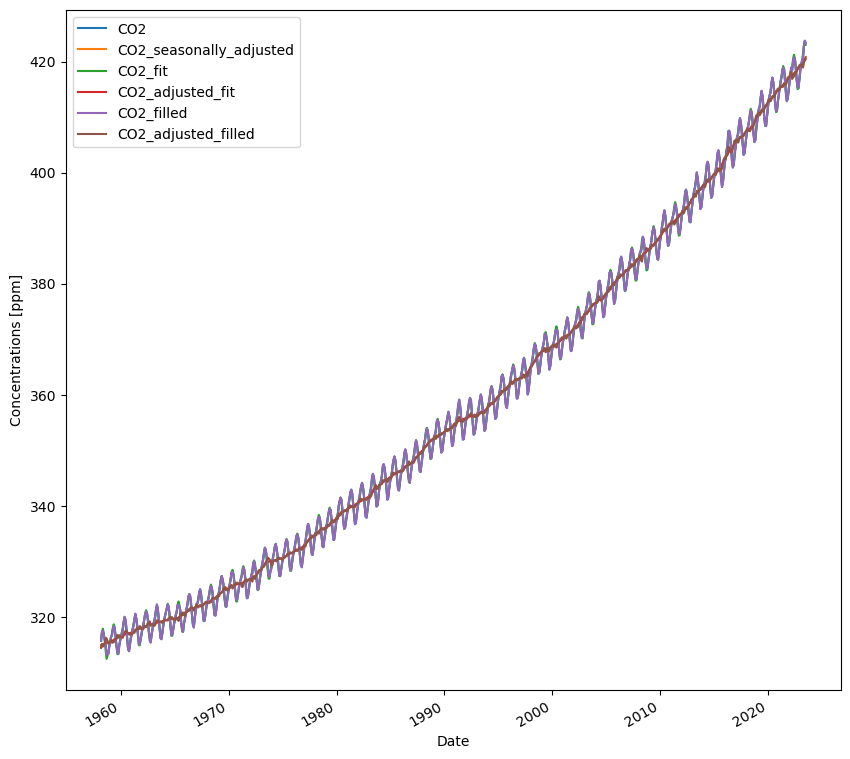

In [162]:
data.iloc[:,4:-1].plot(figsize=(10,10), ylabel = 'Concentrations [ppm]', xlabel='Date')

On observe clairement une composante saisonnière oscillatoire et une composante linéaire. Nous allons essayer de séparer les deux.

### 2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).

<AxesSubplot:xlabel='Date', ylabel='Concentrations [ppm]'>

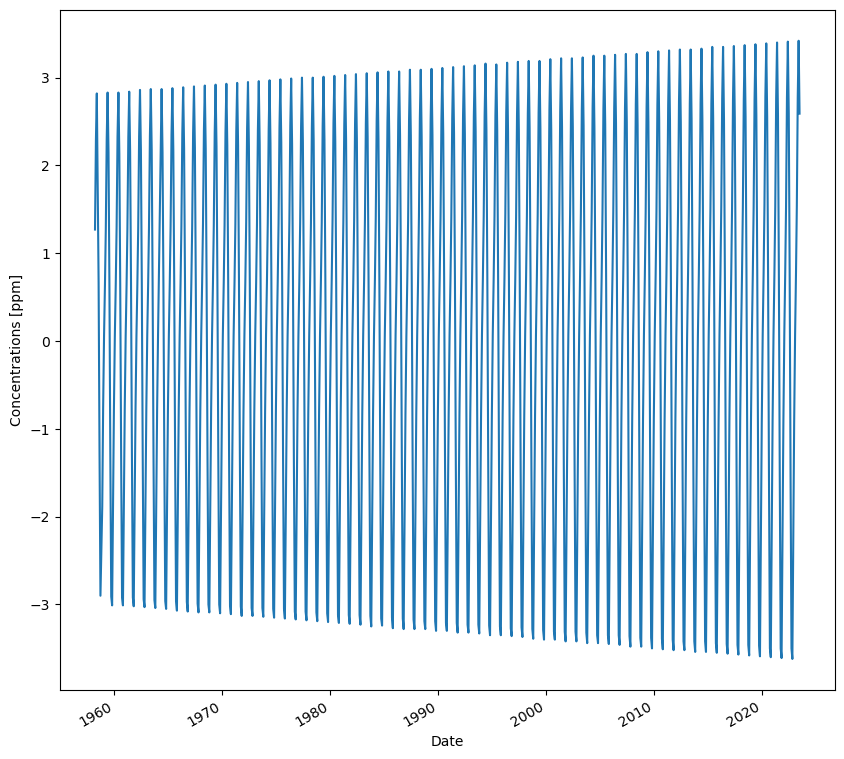

In [163]:
# Extract seasonal component by substracting CO2 seasonnally adjusted
data['oscillation'] = data['CO2'] - data['CO2_seasonally_adjusted']
data['oscillation'].plot(figsize=(10,10), ylabel = 'Concentrations [ppm]', xlabel='Date')

L'amplitude des oscillations saisonnières semble évoluer dans le temps de façon linéaire. La période est d'une année. Tâchons de déterminer la pente de ces oscillations.

<AxesSubplot:xlabel='full_date', ylabel="Amplitude de l'oscillation [m]">

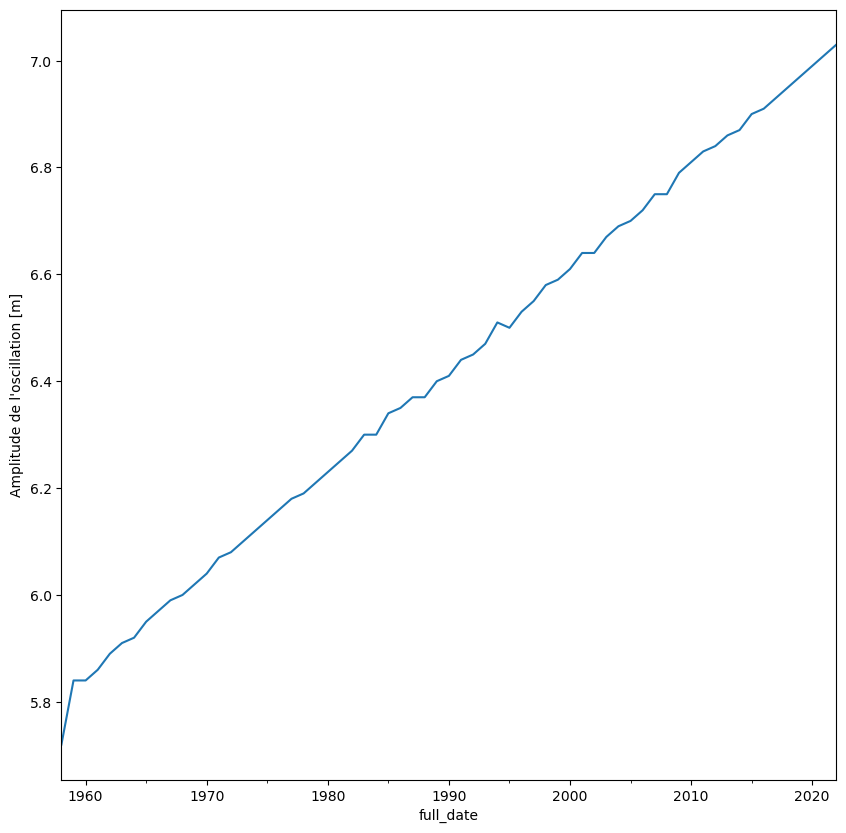

In [164]:
# Remove 2023 as the year is not full
data_years_min = data[data.years <2023]['oscillation'].resample('Y').min()
data_years_max = data[data.years <2023]['oscillation'].resample('Y').max()
amplitude = data_years_max-data_years_min
amplitude.plot(figsize=(10,10), ylabel = "Amplitude de l'oscillation [m]")

In [165]:
import numpy as np

y = amplitude
X = amplitude.index.to_period('Y').astype(int)

# Régression linéaire sur l'amplitude des oscillations en fonction des années
polyfit = np.polyfit(X,y, deg=1)
print(polyfit)
a,b = polyfit

[0.01910883 6.03736189]


L'amplitude des oscillations en fonction des années est de la forme $A = a*Y + b$ où $a \approx 1.91e^{-2}$ et $b \approx 6.03$. L'amplitude des oscillations en 2025 est estimée à :

In [166]:
print(a * (max(amplitude.index.to_period('Y').astype(int)) + 3) + b)

7.088347465034969


Pour la contribution lente, on adopte également un modèle linéaire sur la colonne CO2_adjusted_fit.

In [167]:
y = list(data['CO2_adjusted_fit'])
X = data.index.to_period('Y').astype(int)

# Régression linéaire sur l'amplitude des oscillations en fonction des années
polyfit = np.polyfit(X,y, deg=1)
print(polyfit)
a_slow,b_slow = polyfit

[  1.6204694  325.02914904]


La forme lente en fonction des années est de la forme $A = a*Y + b$ où $a \approx 1.62e^{-2}$ et $b \approx 325.02$. Elle atteindra en 2025 selon ce modèle :

In [168]:
print(a_slow * (max(amplitude.index.to_period('Y').astype(int)) + 2) + b_slow)

412.5344966644169
